<a href="https://colab.research.google.com/github/songseokbeom/ML_study/blob/master/Data_Mining/DM_HW3_20141537_Data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
!pip install scikit-learn==0.20.3
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

     |████████████████████████████████| 5.4 MB 2.3 MB/s eta 0:00:01
ERROR: tpot 0.11.1 has requirement scikit-learn>=0.22.0, but you'll have scikit-learn 0.20.3 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement imbalanced-learn<0.5,>=0.4.0, but you'll have imbalanced-learn 0.6.2 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement numpy<1.16,>=1.13, but you'll have numpy 1.18.2 which is incompatible.
ERROR: imbalanced-learn 0.6.2 has requirement scikit-learn>=0.22, but you'll have scikit-learn 0.20.3 which is incompatible.
ERROR: fancyimpute 0.5.4 has requirement scikit-learn>=0.21.2, but you'll have scikit-learn 0.20.3 which is incompatible.
ERROR: dask-ml 1.2.0 has requirement scikit-learn>=0.21, but you'll have scikit-learn 0.20.3 which is incompatible.
ERROR: cesium 0.9.12 has requirement scikit-learn>=0.22.1, but you'll have scikit-learn 0.20.3 which is incompatible.
ERROR: allennlp 0.9.0 has requirement spacy<2.2,>=2.1.0, but you'll have spacy 2.2.3 whi

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [0]:
train = pd.read_csv('/kaggle/input/2019-1st-ml-month-with-kakr/train.csv')
test = pd.read_csv('/kaggle/input/2019-1st-ml-month-with-kakr/test.csv')

In [0]:
test['Survived'] = np.nan

full = pd.concat([train, test])

In [0]:
from statistics import mode

full['Embarked'] = full["Embarked"].fillna(mode(full["Embarked"]))

full["Sex"][full["Sex"] == "male"] = int(0)
full["Sex"][full["Sex"] == "female"] = int(1)

full["Embarked"][full["Embarked"] == "S"] = int(0)
full["Embarked"][full["Embarked"] == "C"] = int(1)
full["Embarked"][full["Embarked"] == "Q"] = int(2)

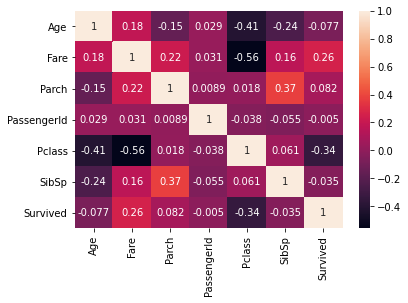

In [0]:
sns.heatmap(full.corr(), annot=True)

In [0]:
full['Age'] = full.groupby("Pclass")['Age'].transform(lambda x: x.fillna(x.median()))

In [0]:
full['Fare'] = full.groupby("Pclass")["Fare"].transform(lambda x: x.fillna(x.median()))

In [0]:
full['Cabin'] = full['Cabin'].fillna('U')

In [0]:
import re

full['Cabin'] = full['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())

In [0]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
full['Cabin'] = full['Cabin'].map(cabin_category)

In [0]:
full['Title'] = full.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [0]:
full['Title'] = full['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir',
                                      'Mme', 'Don'], 'Other')

In [0]:
title_category = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Other':5}
full['Title'] = full['Title'].map(title_category)

In [0]:
full['familySize'] = full['SibSp'] + full['Parch'] + 1

In [0]:
full = full.drop(['Name', 'SibSp', 'Parch', 'Ticket'], axis=1)

In [0]:
test = full[full['Survived'].isna()].drop(['Survived'], axis=1)

In [0]:
train = full[full['Survived'].notna()]

In [0]:
train['Survived'] = train['Survived'].astype(np.int8)

In [0]:
from sklearn.model_selection import train_test_split
train['Embarked'] = train.Embarked.astype(int)
train['Sex'] = train.Sex.astype(int)
train.info()
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived', 'PassengerId'], axis=1),
                                                   train['Survived'], test_size=0.2, random_state=2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
Age            891 non-null float64
Cabin          891 non-null int64
Embarked       891 non-null int64
Fare           891 non-null float64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Survived       891 non-null int8
Title          891 non-null int64
familySize     891 non-null int64
dtypes: float64(2), int64(7), int8(1)
memory usage: 70.5 KB


In [0]:
def eval(model, model_name, X_test, Y_test):
    Y_hat = model.predict(X_test)
    accuracy = np.sum(np.where(Y_hat - Y_test==0, 1, 0)) / X_test.shape[0]
    print(f"Test data prediction accracy {model_name} : {accuracy}")
!pip install decision-tree-id3
!pip install xgboost
!pip install lightgbm

  Created wheel for decision-tree-id3: filename=decision_tree_id3-0.1.2-py3-none-any.whl size=15961 sha256=ee872aa501151edd8753b33a337e1ce76d0a65fc0f89802b12512af8f7ff648d
  Stored in directory: /root/.cache/pip/wheels/bd/7c/1e/db05db2fb5c80f3a6162b534c20874cc194381635172d2d901
Successfully built decision-tree-id3


In [0]:
from sklearn.model_selection import GridSearchCV
from id3 import Id3Estimator

ID3_model = Id3Estimator()
ID3_model.fit(X_train, y_train)
eval(ID3_model, "ID3", X_test, y_test)

In [0]:
from sklearn.tree import DecisionTreeClassifier

CART_model = DecisionTreeClassifier()
CART_model.fit(X_train, y_train)
eval(CART_model, "CART", X_test, y_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest_model = RandomForestClassifier()
Random_Forest_model.fit(X_train, y_train)
eval(Random_Forest_model, "Random Forest", X_test, y_test)

In [0]:
import xgboost as xgb

XGB_model = xgb.XGBClassifier(objective="multi:softmax", num_class=2)
XGB_model.fit(X_train, y_train)
eval(XGB_model, "XGBoost", X_test, y_test)

In [0]:
import lightgbm as lgb

LGBM_model = lgb.LGBMClassifier(objective='binary')
LGBM_model.fit(X_train, y_train)
eval(LGBM_model, "Lightgbm", X_test, y_test)

In [0]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
eval(NB_model, "NaiveBayes", X_test, y_test)

In [0]:
from sklearn.ensemble import VotingClassifier

ensemble_classifier = VotingClassifier(estimators=[('CART', CART_model),
                                                  ('Random_Forest', Random_Forest_model),
                                                  ('XGBoost', XGB_model),
                                                  ('LightGBM', LGBM_model),
                                                  ('Naive Bayes', NB_model),
                                                  ('ID3', ID3_model)],
                                     voting='hard')
ensemble_classifier.fit(X_train, y_train)
eval(ensemble_classifier, "Ensemble", X_test, y_test)